In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from google.colab import drive

In [ ]:
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/Colab Notebooks')

Mounted at /content/drive


Umbral óptimo calculado por Otsu: 118


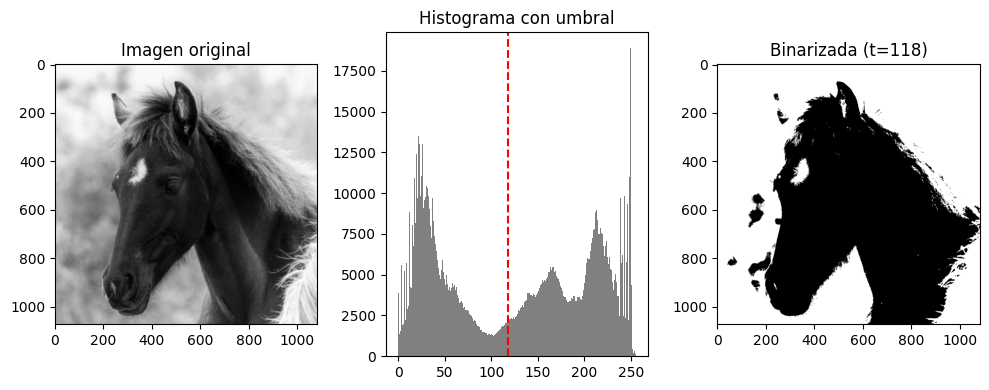

In [ ]:
def otsu_threshold(image):

    # Aplanar la imagen (convertirla en un vector de niveles de gris)
    pixel_values = image.ravel()

    # Calcular histograma y normalizarlo (probabilidades)
    hist, bins = np.histogram(pixel_values, bins=256, range=(0, 256))
    hist = hist.astype(float) / hist.sum()  # Normalización para probabilidades

    # Variables acumuladas
    omega = np.cumsum(hist)          # Probabilidad acumulada
    mu = np.cumsum(hist * np.arange(256))  # Media acumulada
    mu_t = mu[-1]                    # Media total de la imagen

    # Varianza entre clases
    sigma_b = (mu_t * omega - mu)**2 / (omega * (1 - omega) + 1e-6)  # +1e-6 evita división por cero

    # Encontrar el umbral óptimo (índice donde sigma_b es máxima)
    t_optimo = np.argmax(sigma_b)

    return t_optimo


# Cargar imagen en escala de grises
img = Image.open("caballo.png").convert("L")
img_np = np.array(img)

Gaussian = cv2.GaussianBlur(img_np, (5, 5), 0)

# Calcular umbral con Otsu
umbral = otsu_threshold(img_np)
print(f"Umbral óptimo calculado por Otsu: {umbral}")

# Binarizar la imagen usando el umbral
ret, img_binarizada = cv2.threshold(img_np, umbral, 255, cv2.THRESH_BINARY)

# Mostrar resultados
plt.figure(figsize=(10,4))
plt.subplot(1,3,1)
plt.imshow(img_np, cmap="gray")
plt.title("Imagen original")

plt.subplot(1,3,2)
plt.hist(img_np.ravel(), bins=256, range=(0,256), color='gray')
plt.axvline(umbral, color='red', linestyle='--')
plt.title("Histograma con umbral")

plt.subplot(1,3,3)
plt.imshow(img_binarizada, cmap="gray")
plt.title(f"Binarizada (t={umbral})")

plt.tight_layout()
plt.show()
